<h1>Импорт библиотек

In [64]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из p матриц размерностью (n, n) и p векторов размерностью (n, 1), найти сумму произведений матриц на векторы. Написать тесты для кода

In [65]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    summ = 0
    for i in range(len(X)):
        summ += np.dot(X[i], V[i])
    return summ 


def test():
    # Тест 1
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([[1], [1]]), np.array([[1], [1]])]
    result = np.array([[14], [22]])
    assert np.array_equal(sum_prod(X, V), result), 'Test case failed'

    # Тест 2
    X = [np.array([[2, 0], [0, 2]]), np.array([[1, 1], [1, 1]])]
    V = [np.array([[1], [2]]), np.array([[3], [4]])]
    result = np.array([[9], [11]])
    assert np.array_equal(sum_prod(X, V), result), 'Test case failed' 


test()

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [66]:
def binarize(M, threshold=0.5):
    mask = np.array(M > threshold, dtype=int)
    return mask 


def test():
    # Тест 1
    matrix = np.array([[1, 2], [3, 4]])
    result = np.array([[1, 1], [1, 1]])
    assert np.array_equal(binarize(matrix), result), 'Test case failed'

    # Тест 2
    matrix = np.array([[0.3, 0], [0.9, 1]])
    result = np.array([[0, 0], [1, 1]])
    assert np.array_equal(binarize(matrix), result), 'Test case failed' 


test()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [67]:
def unique_rows(matrix):
    result = [set(np.unique(row)) for row in matrix]
    return result


def unique_columns(matrix):
    result = []
    shape = np.shape(matrix)
    for j in range(shape[1]):
        result.append(set(np.unique(matrix[ : , j])))
    return result


def test():
    # Тест 1
    matrix = np.array([[1, 2, 3], [1, 4, 4]])
    # (уникальность в строках)
    result = [{1, 2, 3}, {1, 4}]
    assert unique_rows(matrix) == result, 'Test case failed'  
    # (уникальность в столбцах)
    result = [{1}, {2, 4}, {3, 4}]
    assert unique_columns(matrix) == result, 'Test case failed'

    # Тест 2
    matrix = np.array([[1, 1, 3], [5, 8, 9], [9, 9, 3]])
    # (уникальность в строках)
    result = [{1, 3}, {5, 8, 9}, {9, 3}]
    assert unique_rows(matrix) == result, 'Test case failed'  
    # (уникальность в столбцах)
    result = [{1, 5, 9}, {1, 8, 9}, {3, 9}]
    assert unique_columns(matrix) == result, 'Test case failed'


test()

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами (m, n) случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Матрица:
[[ 0.74537897 -0.32960983  0.17092114]
 [ 1.82204469  0.04034822  0.40581867]
 [ 0.24420975  0.29723013  1.59938571]]

Математическое ожидание строк: [0.19556343 0.75607053 0.71360853]
Дисперсия строк: [0.19290378 0.5904119  0.39276913]

Математическое ожидание столбцов: [0.93721114 0.00265617 0.72537517]
Дисперсия столбцов: [0.43332697 0.0661984  0.39114335]


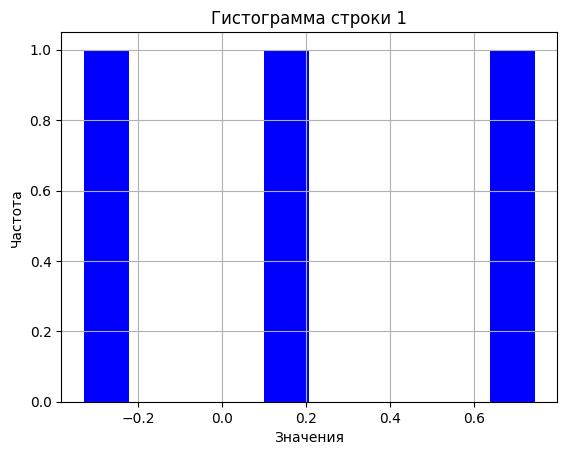

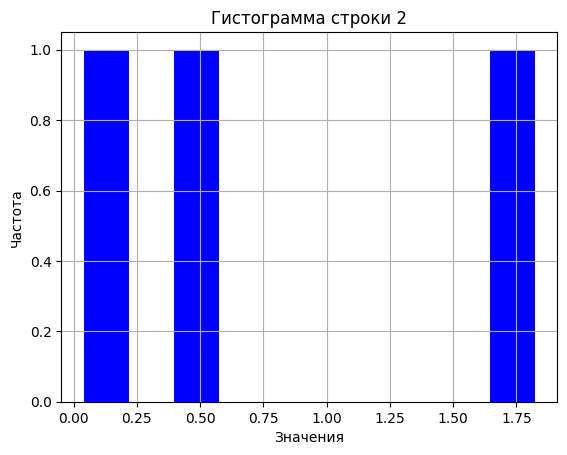

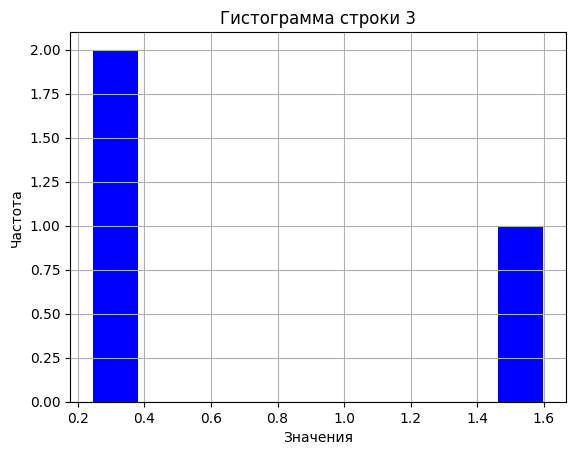

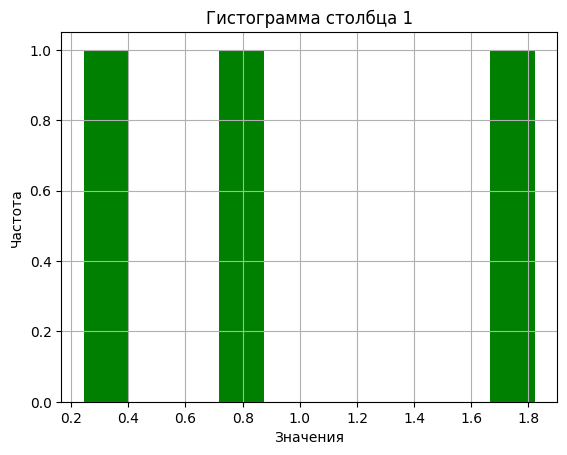

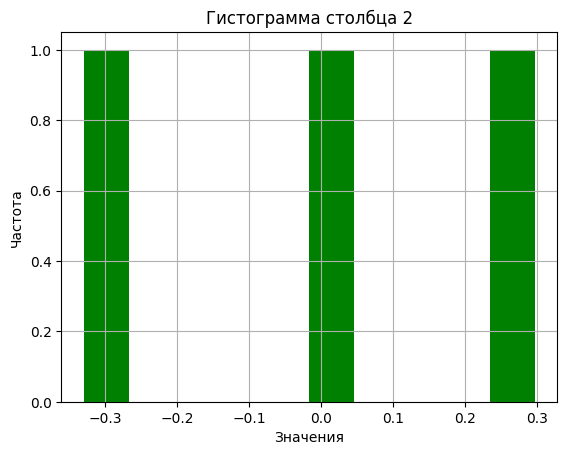

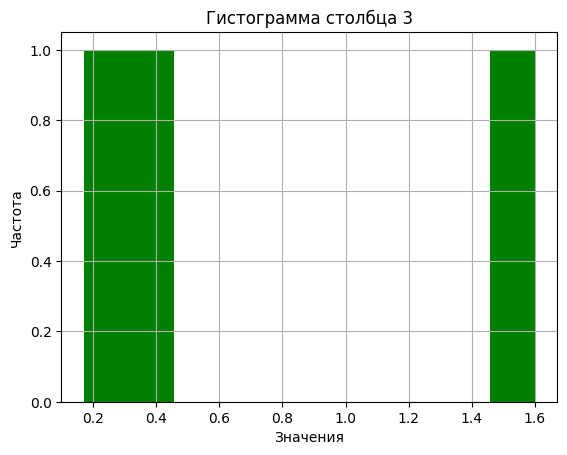

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def func(m, n):
    matrix = np.random.normal(size=(m, n))
    
    # Вычисление мат. ожидания и дисперсии для строк
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    
    # Вычисление мат. ожидания и дисперсии для столбцов
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    
    # Вывод результатов
    print("Матрица:")
    print(matrix)
    print("\nМатематическое ожидание строк:", row_means)
    print("Дисперсия строк:", row_vars)
    print("\nМатематическое ожидание столбцов:", col_means)
    print("Дисперсия столбцов:", col_vars)
    
    # Построение гистограмм для строк
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins=10, color='blue')
        plt.title(f'Гистограмма строки {i+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()
    
    # Построение гистограмм для столбцов
    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, color='green')
        plt.title(f'Гистограмма столбца {j+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

# Пример использования функции
func(3, 3)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу (m, n) в шахматном порядке заданными числами a и b. Напишите тесты для кода

In [69]:
def chess(m, n, a, b):
    matrix = np.ones((m, n))
    s = a + b
    for i in range(matrix.shape[0]):
        if i > 0:
            num = s - matrix[i - 1, 0]
        else:
            num = a
        for j in range(matrix.shape[1]):
            matrix[i, j] = num 
            num = s - num 
    return matrix

# Тесты
def test():
    # Тест 1
    result = np.array([[1, 2, 1],
                       [2, 1, 2],
                       [1, 2, 1]])
    assert np.array_equal(chess(3, 3, 1, 2), result), "Test case failed"
    
    # Тест 2
    result = np.array([[0, 1, 0, 1],
                       [1, 0, 1, 0],
                       [0, 1, 0, 1],
                       [1, 0, 1, 0]])
    assert np.array_equal(chess(4, 4, 0, 1), result), "Test case failed"
    
    # Тест 3
    result = np.array([[3, 4, 3, 4, 3],
                       [4, 3, 4, 3, 4]])
    assert np.array_equal(chess(2, 5, 3, 4), result), "Test case failed"


test()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

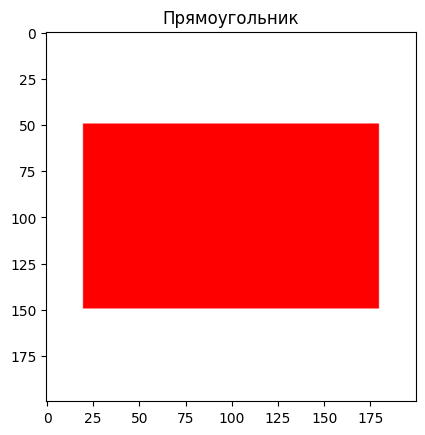

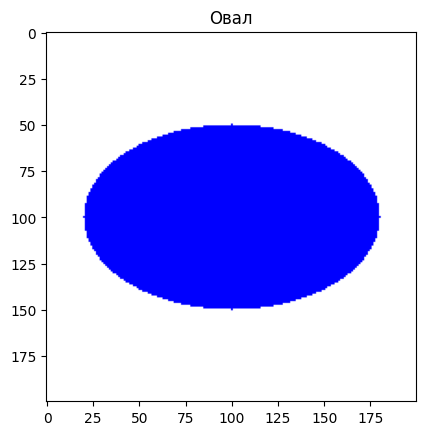

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Создаем изображение с фоном
    image = np.ones((m, n, 3), dtype=np.uint8) * np.array(background_color, dtype=np.uint8)
    
    # Вычисляем координаты прямоугольника, чтобы он был по центру
    x1 = (m - a) // 2
    y1 = (n - b) // 2
    x2 = x1 + a
    y2 = y1 + b
    
    # Рисуем прямоугольник
    image[y1:y2, x1:x2] = rectangle_color
    
    return image


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Создаем изображение с фоном
    image = np.ones((m, n, 3), dtype=np.uint8) * np.array(background_color, dtype=np.uint8)
    
    # Центр изображения
    x0, y0 = m // 2, n // 2
    
    # Создаем сетку координат
    x, y = np.ogrid[:m, :n]
    
    # Уравнение эллипса
    mask = ((x - x0) ** 2 / a ** 2 + (y - y0) ** 2 / b ** 2) <= 1
    
    # Рисуем овал
    image[mask] = ellipse_color
    
    return image


# Тесты
def test():
    # Тест для прямоугольника
    rect_image = draw_rectangle(160, 100, 200, 200, (255, 0, 0), (255, 255, 255))
    plt.imshow(rect_image)
    plt.title("Прямоугольник")
    plt.show()
    
    # Тест для овала
    oval_image = draw_ellipse(50, 80, 200, 200, (0, 0, 255), (255, 255, 255))
    plt.imshow(oval_image)
    plt.title("Овал")
    plt.show()


# Запуск тестов
test()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [71]:
import numpy as np

# Пример временного ряда
time_series = np.array([1, 4, 3, 1, 5, 6, 0, 1, 2, 2, 1])
print(f'Пример временного ряда: {time_series}')

# Математическое ожидание
mean = np.mean(time_series)
print(f"Математическое ожидание: {mean}")

# Дисперсия
var = np.var(time_series)
print(f"Дисперсия: {var}")

# Стандартное квадратическое отклонение (СКО)
std = np.std(time_series)
print(f"Стандартное квадратическое отклонение: {std}")

# Поиск локальных максимумов и минимумов
def find_local_extrema(time_series):
    lst_local_min = []
    lst_local_max = []
    for i in range(1, len(time_series) - 1):
        if time_series[i] < time_series[i-1] and time_series[i] < time_series[i+1]:
            lst_local_min.append(time_series[i])
        elif time_series[i] > time_series[i-1] and time_series[i] > time_series[i+1]:
            lst_local_max.append(time_series[i])
    return lst_local_max, lst_local_min


lst_local_max, lst_local_min = find_local_extrema(time_series)
print(f"Локальные максимумы: {lst_local_max}")
print(f"Локальные минимумы: {lst_local_min}")

# Метод скользящего среднего
def moving_average(time_series, window_size):
    return np.convolve(time_series, np.ones(window_size), 'valid') / window_size


# Пример использования метода скользящего среднего с заданным размером окна
p = 3
moving_avg_series = moving_average(time_series, p)
print(f"Ряд, получаемый методом скользящего среднего с размером окна {p}: {moving_avg_series}")

Пример временного ряда: [1 4 3 1 5 6 0 1 2 2 1]
Математическое ожидание: 2.3636363636363638
Дисперсия: 3.322314049586778
Стандартное квадратическое отклонение: 1.8227216050694022
Локальные максимумы: [4, 6]
Локальные минимумы: [1, 0]
Ряд, получаемый методом скользящего среднего с размером окна 3: [2.66666667 2.66666667 3.         4.         3.66666667 2.33333333
 1.         1.66666667 1.66666667]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [72]:
import numpy as np

def one_hot_encode(vector):
    # Определяем количество уникальных классов
    num_classes = np.max(vector) + 1
    
    # Создаем матрицу нулей с размером (длина вектора, количество классов)
    one_hot_matrix = np.zeros((len(vector), num_classes))
    
    # Заполняем матрицу единицами в соответствующих позициях
    for idx, val in enumerate(vector):
        one_hot_matrix[idx, val] = 1
    
    return one_hot_matrix

# Пример использования
vector = [0, 2, 3, 0]
result = one_hot_encode(vector)
print(result)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
